<a href="https://colab.research.google.com/github/njafarov/Optimization_MILP/blob/main/Facility_Location_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.7 MB/s 
     |████████████████████████████████| 49 kB 3.1 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Pr

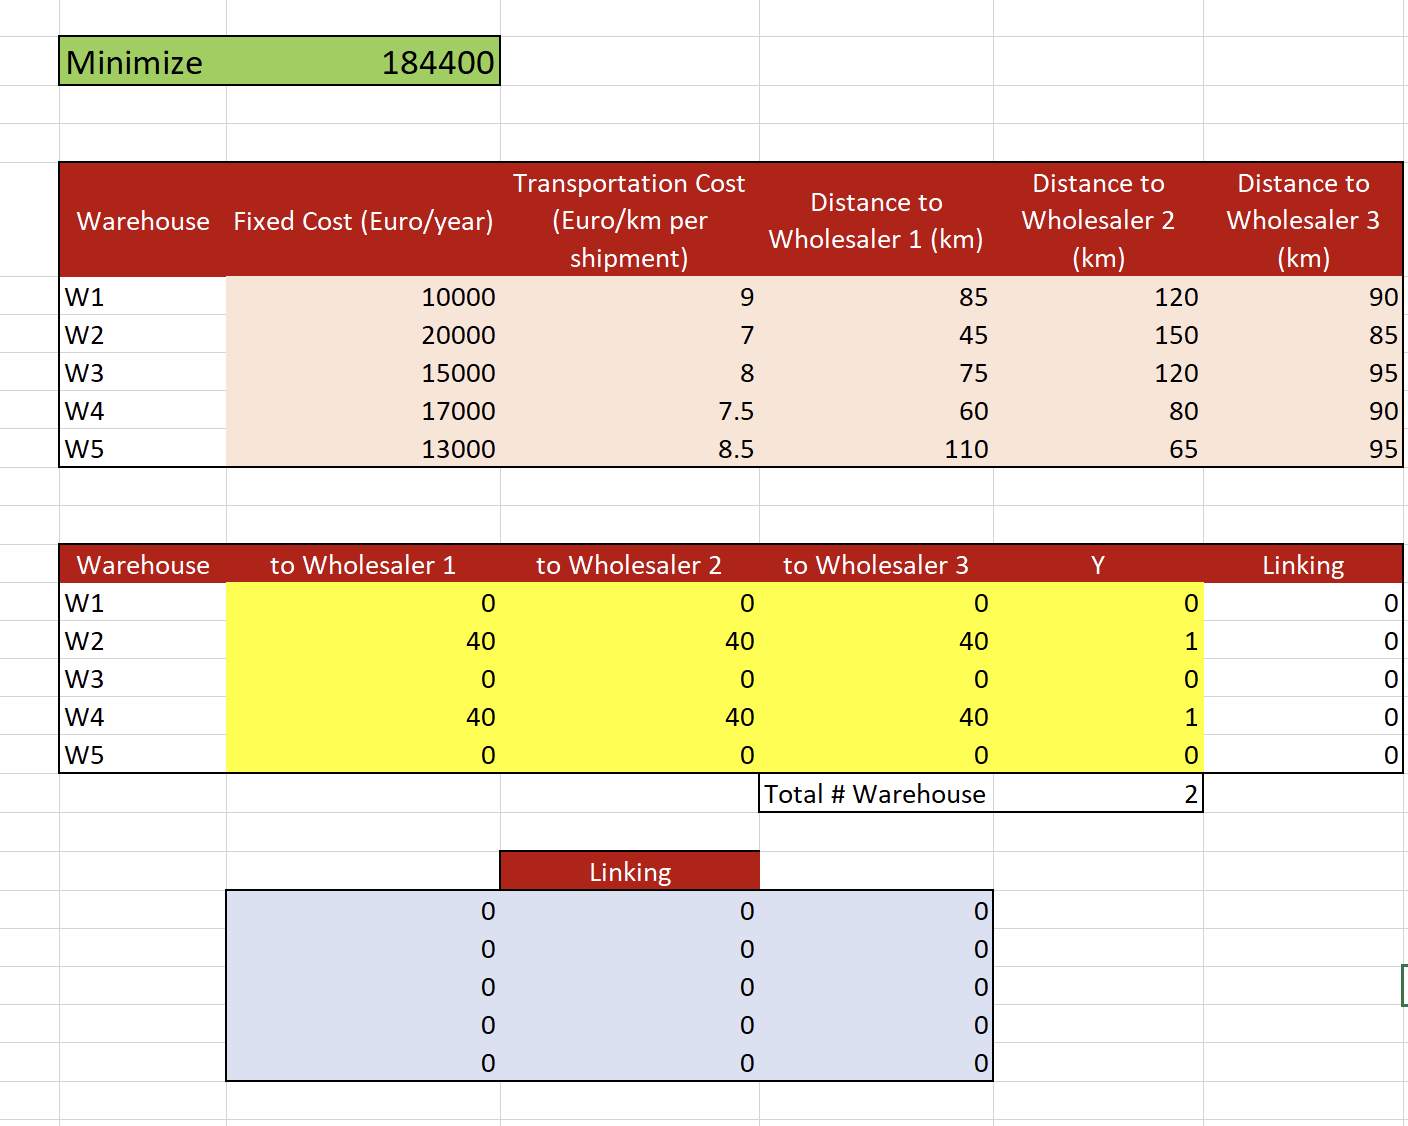

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [12]:
# Define the model
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.RangeSet(1,5)
model.j = pyo.RangeSet(1,3)

# Define parameters
model.VarCost = pyo.Param(model.i, initialize={1:9,2:7,3:8,4:7.5,5:8.5})
VarCost = model.VarCost # Variable cost to transport from WH 

model.FixCost = pyo.Param(model.i, initialize={1:10000,2:20000,3:15000,4:17000,5:13000})
FixCost = model.FixCost # Fixed cost of WH

model.Dis = pyo.Param(model.i,model.j, initialize={(1,1):85,(1,2):120,(1,3):90,
                                                      (2,1):45,(2,2):150,(2,3):85,
                                                      (3,1):75,(3,2):120,(3,3):95,
                                                      (4,1):60,(4,2):80,(4,3):90,
                                                      (5,1):110,(5,2):65,(5,3):95})
Dis = model.Dis #Distance between warehouse and wholesale 

# Varables
model.x = pyo.Var(model.i, model.j, within=pyo.NonNegativeIntegers)
x = model.x
model.y = pyo.Var(model.i, within=pyo.Binary)
y=model.y

# Objective function
def objective_function(model):
  return sum(sum(x[i,j]*Dis[i,j]*VarCost[i] for i in model.i)for j in model.j)+sum(FixCost[i]*y[i] for i in model.i)
model.Obj = pyo.Objective(rule = objective_function, sense=pyo.minimize)


def cons1(model,i,j):
  return x[i,j]-y[i]*40==0
model.Cons1 = pyo.Constraint(model.i, model.j,rule=cons1) 

def cons2(model):
  return sum(y[i] for i in model.i)==2
model.Cons2 = pyo.Constraint(rule=cons2)

# Optimization
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print("Objective funct: ",model.Obj())

for i in model.i:
  for j in model.j:
    print("From WH ",i,x[i,j](),"amount of materials goes to Wholesaler",j)


Objective funct:  184400.0
From WH  1 0.0 amount of materials goes to Wholesaler 1
From WH  1 0.0 amount of materials goes to Wholesaler 2
From WH  1 0.0 amount of materials goes to Wholesaler 3
From WH  2 40.0 amount of materials goes to Wholesaler 1
From WH  2 40.0 amount of materials goes to Wholesaler 2
From WH  2 40.0 amount of materials goes to Wholesaler 3
From WH  3 0.0 amount of materials goes to Wholesaler 1
From WH  3 0.0 amount of materials goes to Wholesaler 2
From WH  3 0.0 amount of materials goes to Wholesaler 3
From WH  4 40.0 amount of materials goes to Wholesaler 1
From WH  4 40.0 amount of materials goes to Wholesaler 2
From WH  4 40.0 amount of materials goes to Wholesaler 3
From WH  5 0.0 amount of materials goes to Wholesaler 1
From WH  5 0.0 amount of materials goes to Wholesaler 2
From WH  5 0.0 amount of materials goes to Wholesaler 3
